# Continuous vs Categorical Data👨🏻‍💻
---

### Agenda
<ul>
<li><a href="#Analyze">How to Analyze One Variable?</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#Encoding">Encoding Categorical Data</a></li>
<li><a href="#Graphing">Continuous vs Categorical Analysis & Visualization</a></li>
</ul>

<a id='Analyze'></a>
## How to Analyze One Variable? 🤔👇
---
**- Raw Data**:  

   - Obtain a printout of the raw data for all the variables. Raw data resembles a matrix, with the variable names heading the columns, and the information for each case or record displayed across the rows.

   
**- Frequency Distribution**  
   - Obtain a frequency distribution of the data for the variable. This is done by identifying the lowest and highest values of the variable, and then putting all the values of the variable in order from lowest to highest. 
    
    
**- Grouped Data**  
   - Decide on whether the data should be grouped into classes.


**- Cumulative Distributions**  
   - Cumulative frequency distributions include a third column in the table (this can be done with either simple frequency distributions or with grouped data):


**- Percentage Distributions**  
   - Frequencies can also be presented in the form of percentage distributions and cumulative percentages.


## <a id='Preparing'></a>Preparing Our Environment 📥
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling 📂
---
- Data Loading

- Variable Identification

- Data Type

---
### Exercise 1.👇
**In this exercise, we will use the** `noshowappointments.csv` **CSV dataset file which we can load using pandas.**
- Load data and print out a few lines. 
- Perform operations to inspect data types and look for instances of missing or possibly errant data.

In [2]:
df = pd.read_csv("Data/noshowappointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# import pandas as pd
# from pandas_profiling import ProfileReport
 
# ProfileReport(df)

In [4]:
# Get the info report
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Hint🧐**: The above report showing are ScheduledDay & AppointmentDay have 'object' Dtype

---
### Variable Identification

In [41]:
df.shape

(110527, 14)

In [42]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [43]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Hint🧐**: Minimum age is showing -ve one and Maximum is showing above 100 

In [44]:
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


---
### Data Type 

#### 1) Variable Category

| Variable Category |
|:----------|
| Gender| 
| Neighbourhood | 
| Scholarship | 
| Hipertension | 
| Diabetes| 
|  Alcoholism| 
| Handcap | 
| SMS_received | 
| No-show | 

#### 2) Variable Numeric
| Variable Numeric |
|:----------|
| PatientId| 
| AppointmentID | 
| Age | 
| Scholarship | 
| Hipertension| 
|  Diabetes| 
| Alcoholism | 
| Handcap | 
| SMS_received | 

In [45]:
# Check missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Hint🧐**:There are no missing values in the above dataset

In [46]:
# Check for Neighbourhood column
df['Handcap'].value_counts()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

**Hint🧐**:Based on previous check for Neighbourhood column, i see this columns doesn't help me in perdict no-show appointment. so i will drop this column

---
<a id='Cleaning'></a>
# Data Cleaning 

- Convert each of ScheduledDay & AppointmentDay to 'datetime' Dtype.

- Drop outlier values from Age.

---
### Exercise 2.👇
**In this exercise, we will continue with the** `noshowappointments.csv` **CSV dataset file**
- Convert each of `ScheduledDay` & `AppointmentDay` to datetime Dtype.
- Drop Age grater than 100 and less than 0.

In [47]:
# Convert columns types
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
# Check if the type is now datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [48]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [49]:
# Check for Age grater than 100
df[df['Age']>=100]['Age'].value_counts()

Age
115    5
100    4
102    2
Name: count, dtype: int64

In [50]:
# Check for Age less than 0
df[df['Age']<= 0]['Age'].value_counts()

Age
 0    3539
-1       1
Name: count, dtype: int64

In [51]:
# Drop Age grater than 100 and less than 0
df = df[df['Age']<100]
df = df[df['Age']>0]
df['Age'].describe()

count    106976.000000
mean         38.309004
std          22.456395
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max          99.000000
Name: Age, dtype: float64

---

## Add Feature 
Inrich Data with new features to benfit from avaliable dataset
- Add `Waiting_Days` feature which is the differance between `ScheduledDay` & `AppointmentDay`

- Analize `AppointmentDay` to Day in week in column called `appointment_Day_in_Week`

In [52]:
# Inrich Data with new feature called `Waiting_Days` coulmn
df['Waiting_Days'] = abs((df['ScheduledDay'] - df['AppointmentDay']).dt.days)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_Days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [53]:
# Create new feature called "appointment_Day_in_Week"
df['appointment_Day_in_Week'] =df['AppointmentDay'].dt.day_name()
df['appointment_Day_in_Week']

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
110522    Tuesday
110523    Tuesday
110524    Tuesday
110525    Tuesday
110526    Tuesday
Name: appointment_Day_in_Week, Length: 106976, dtype: object

---
## Drop less important columns

In [54]:
# Drop less important columns for us
dropes_columns = ['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay']
df.drop(df[dropes_columns],axis=1,inplace=True)

In [55]:
dropes_columns = ['Neighbourhood']
df.drop(df[dropes_columns],axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106976 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   106976 non-null  object
 1   Age                      106976 non-null  int64 
 2   Scholarship              106976 non-null  int64 
 3   Hipertension             106976 non-null  int64 
 4   Diabetes                 106976 non-null  int64 
 5   Alcoholism               106976 non-null  int64 
 6   Handcap                  106976 non-null  int64 
 7   SMS_received             106976 non-null  int64 
 8   No-show                  106976 non-null  object
 9   Waiting_Days             106976 non-null  int64 
 10  appointment_Day_in_Week  106976 non-null  object
dtypes: int64(8), object(3)
memory usage: 9.8+ MB


#           ****************                               *****************
#                              🥳🥳   Break 🥳🥳

#           ****************                               *****************

--- 
<a id='Encoding'></a>
## Encoding Categorical Data🤔

You will now learn different techniques to encode the categorical features to numeric quantities. To keep it simple, you will apply these encoding methods only on the carrier column. However, the same approach can be extended to all columns.

**The techniques that you'll cover are the following:**

- Replacing values
- Encoding labels
- One-Hot encoding

<img src='images/Categorical.png' width=500>

### Ordinal Encoding
- In ordinal encoding, each unique category value is assigned an integer value.

- This ordinal encoding transform is available in the **scikit-learn** Python machine learning library via the `OrdinalEncoder` class.

In [57]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = asarray(df['Gender']).reshape(-1, 1)
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)

[['F']
 ['M']
 ['F']
 ...
 ['F']
 ['F']
 ['F']]
[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


### One Hot Coding
- For categorical variables where there is no ordinal relationship, integer coding may be insufficient, at best, or misleading of the model at worst.

- This one-hot encoding transform is available in the **scikit-learn** Python machine learning library via the `OneHotEncoder` class.

In [58]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray(df['Gender']).reshape(-1,1)
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[['F']
 ['M']
 ['F']
 ...
 ['F']
 ['F']
 ['F']]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


C:\Users\k.alquraan.ext\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


---
<a id='Graphing'></a>
# Continuous vs Categorical Analysis
---

### Exercise 3.👇

**In this exercise, we will continue with the noshowappointments.csv CSV dataset file**

- Get the value counts of `Gender` column.
- Check for unique numbers in `Handcap` column.
- Plot bar `Handcap` column (Before Editing).
- Remove weird values in `Handcap` column.
- Plot bar `Handcap` column (After Editing).

In [59]:
df.head(1)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_Days,appointment_Day_in_Week
0,F,62,0,1,0,0,0,0,No,0,Friday


In [60]:
df['Gender'].value_counts()

Gender
F    70109
M    36867
Name: count, dtype: int64

In [61]:
# Check for unique numbers in Handcap column
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

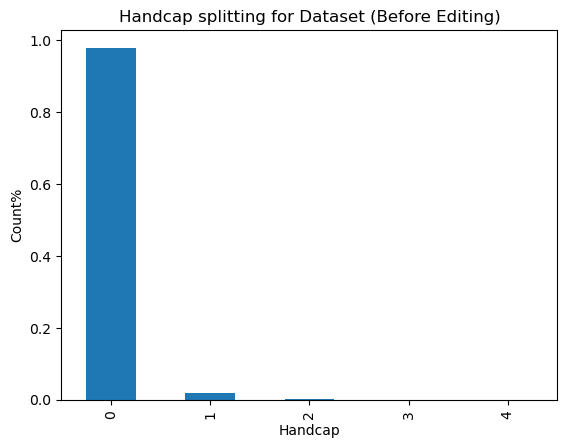

In [62]:
# Plot bar Handcap column (Before Editing)
df['Handcap'].value_counts(normalize=True).plot.bar(title = 'Handcap splitting for Dataset (Before Editing)')
plt.xlabel('Handcap')
plt.ylabel('Count%');

In [63]:
# Remove weird values in Handcap column
df.loc[df.Handcap >1,'Handcap']=1
df['Handcap'].unique()

array([0, 1], dtype=int64)

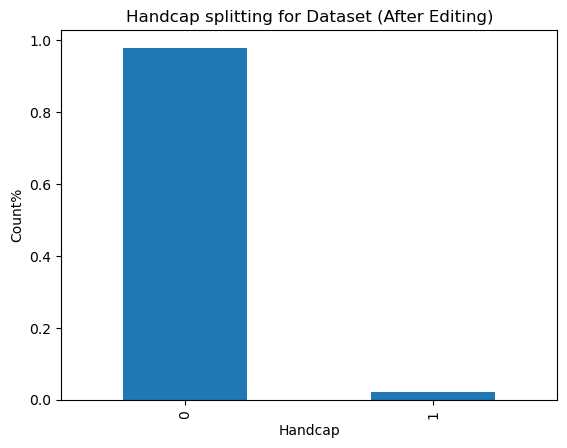

In [64]:
# Plot bar Handcap column (After Editing)
df['Handcap'].value_counts(normalize=True).plot.bar(title = 'Handcap splitting for Dataset (After Editing)')
plt.xlabel('Handcap')
plt.ylabel('Count%');

### ⟹ Now Your Turn 💪💪
---

- Get the value counts of [`Diabetes`, `Alcoholism`, `Hipertension`, `Handcap`] columns.

- Check for unique numbers in `Scholarship` column.

- Check for values counts in `Scholarship` & `No-show` column.

-  Normalize values counts in No-show column.

In [65]:
# df = pd.read_csv("Data/noshowappointments.csv")
# df.head()

In [66]:
### Write Your Code

### Get the value counts of [Diabetes, Alcoholism, Hipertension, Handcap] columns.
# Start Code
df['Diabetes'].value_counts()
df['Alcoholism'].value_counts()
df['Hipertension'].value_counts()
df['Handcap'].value_counts()
# End Code

#===============================================================================================================
### Check for unique numbers in Scholarship column.
# Start Code
df['Scholarship'].unique()
# End Code

#===============================================================================================================
### Check for values counts in Scholarship & No-show column.
# Start Code
df['Scholarship'].value_counts()
# End Code

#===============================================================================================================
### Normalize values counts in No-show column
# Start Code
df['No-show'].value_counts(normalize=True)
# End Code

No-show
No     0.797366
Yes    0.202634
Name: proportion, dtype: float64

**Expected Output**

Number of patients with Diabetes: `7943`  
Number of patients with Alcoholism: `3360`   
Number of patients with Hipertension: `21800`   
Number of patients with Handcap: `2234`  

===============================================================================================================    
Unique numbers in Scholarship: `array([0, 1])`  

===============================================================================================================

Number of patients without Scholarship: `96167`  
Number of patients with Scholarship: `10809`  
    
===============================================================================================================

Number of patients with No-show= No: `85299`  
Number of patients with No-show= Yes: `21677`  

===============================================================================================================

    
Number of patients with No-show= No in (%): `79.7366%`  
Number of patients with No-show in(%)= Yes: `20.2634%`

---
## Visualize Categorical Features

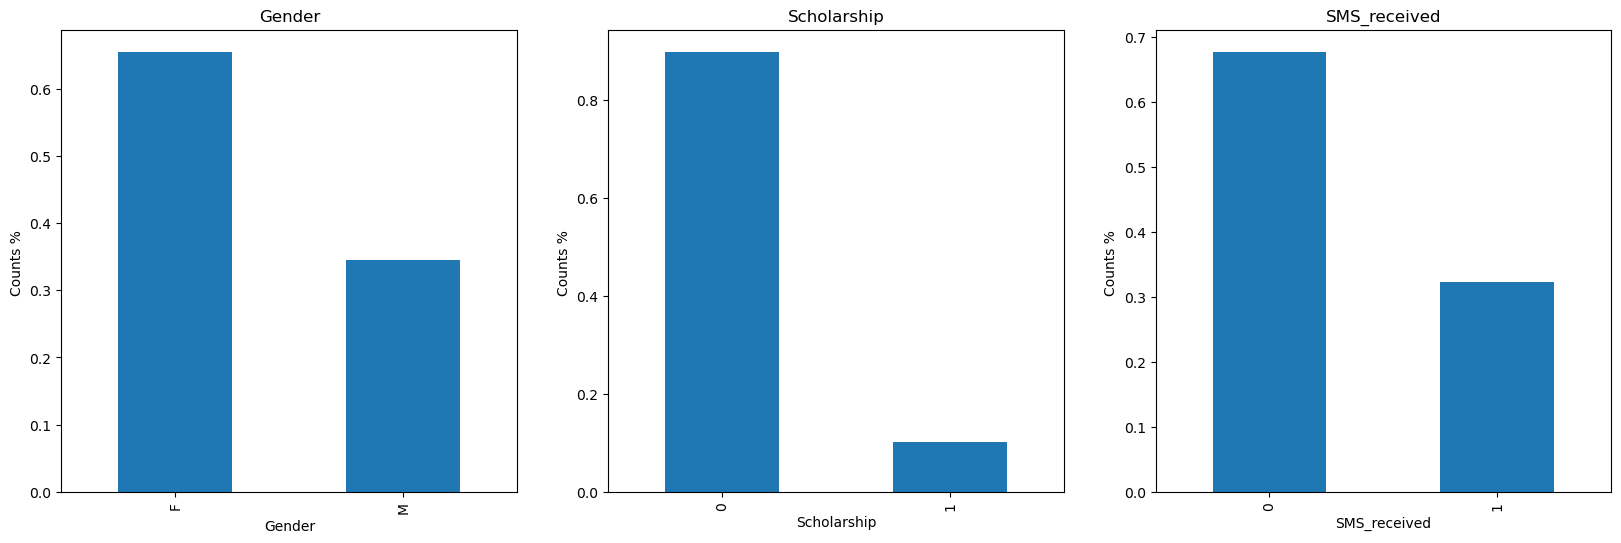

In [67]:
plt.figure(1)
cat_cols = ['Gender','Scholarship','SMS_received']

for col in cat_cols:
    plt.subplot(1, len(cat_cols), cat_cols.index(col) + 1)
    df[col].value_counts(normalize= True).plot.bar(figsize = (20,6),title=col)
    plt.ylabel("Counts % ");

## Visualize Numerical Features
---

In [68]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Waiting_Days
count,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000
mean,38.309004,0.101041,0.203784,0.074250,0.031409,0.020883,0.323278,10.166981
std,22.456395,0.301385,0.402812,0.262179,0.174421,0.142994,0.467730,15.263657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


C:\Users\k.alquraan.ext\AppData\Local\Temp\ipykernel_3520\2406857290.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\k.alquraan.ext\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


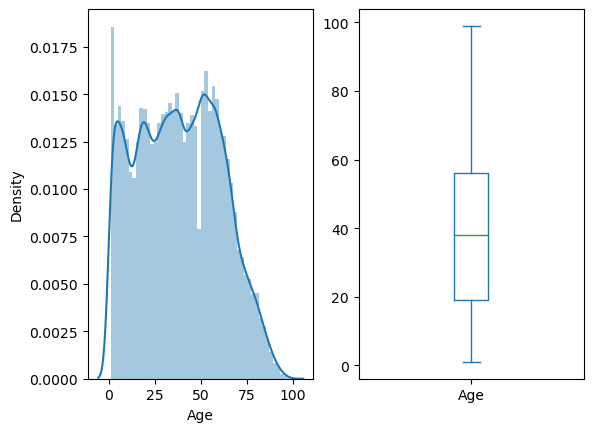

In [69]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Age'])

plt.subplot(122)
df['Age'].plot.box()

plt.show()

### ⟹ Now Your Turn 💪💪
---

- Visualize Categorical Features of [`Diabetes`, `Alcoholism`, `Hipertension`, `Handcap`] columns.

In [40]:
cat_cols2 = ['Hipertension', 'Diabetes','Alcoholism', 'Handcap']

### Write Your Code
# Start Code

# End Code

# Good Luck 🤗 🤗 🤗